In [ ]:
Fasttagfraud Prediction

In [150]:
import pandas as pd

# Load the dataset
data = pd.read_csv('FastagFraudDetection.csv')

# Display dataset information
print("Dataset shape:", data.shape)
print("Columns:", data.columns)
print("Sample data:", data.head())
print("Missing values:", data.isnull().sum())
print("Data types:", data.dtypes)


Dataset shape: (5000, 13)
Columns: Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')
Sample data:    Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          1

In [152]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values (assuming imputation or removal as necessary)
data = data.dropna()

# Convert timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Encode the target variable
label_encoder = LabelEncoder()
data['Fraud_indicator'] = label_encoder.fit_transform(data['Fraud_indicator'])

# Print updated data information
print("Updated data types:", data.dtypes)
print("Sample data:", data.head())


Updated data types: Transaction_ID                    int64
Timestamp                datetime64[ns]
Vehicle_Type                     object
FastagID                         object
TollBoothID                      object
Lane_Type                        object
Vehicle_Dimensions               object
Transaction_Amount                int64
Amount_paid                       int64
Geographical_Location            object
Vehicle_Speed                     int64
Vehicle_Plate_Number             object
Fraud_indicator                   int32
dtype: object
Sample data:    Transaction_ID           Timestamp Vehicle_Type         FastagID  \
0               1 2023-01-06 11:20:00         Bus   FTG-001-ABC-121   
1               2 2023-01-07 14:55:00          Car  FTG-002-XYZ-451   
3               4 2023-01-09 02:05:00        Truck  FTG-044-LMN-322   
4               5 2023-01-10 06:35:00          Van  FTG-505-DEF-652   
5               6 2023-01-11 10:00:00        Sedan  FTG-066-GHI-987   

  Toll

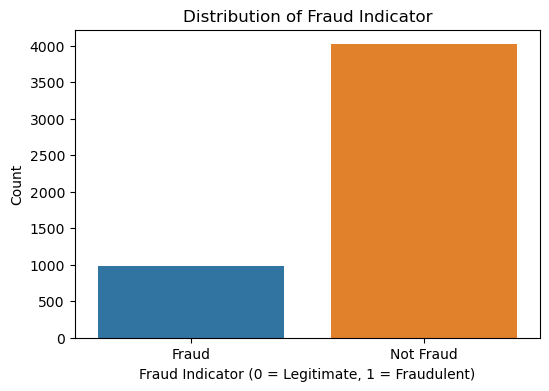

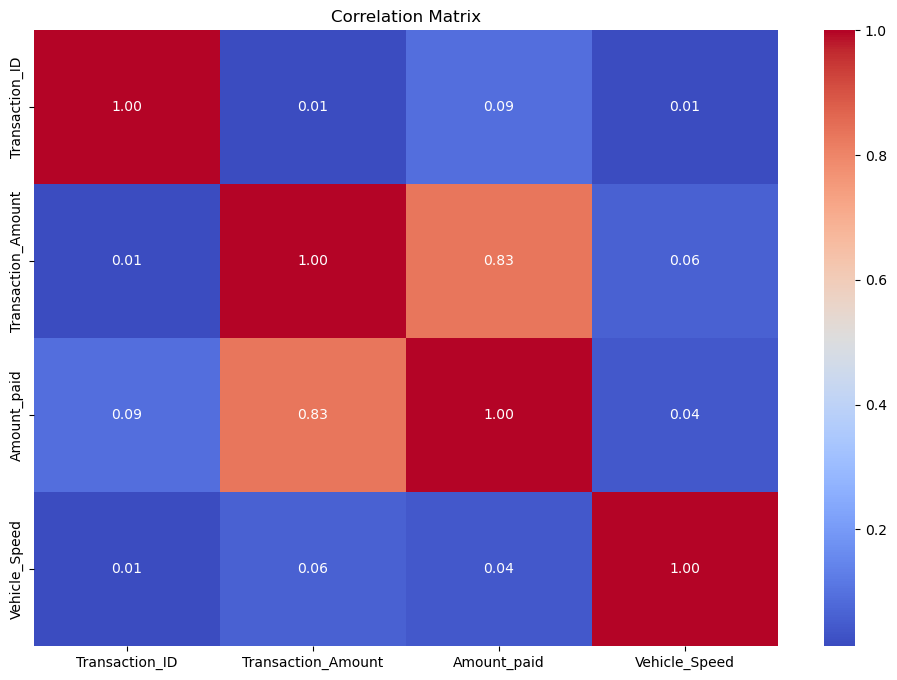

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable

plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()

# Correlation matrix
numeric_df = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [155]:
# Extract features from timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year

# Drop unnecessary columns
data = data.drop(columns=['Transaction_ID', 'Timestamp', 'Vehicle_Plate_Number'])


In [158]:
print(data)

     Vehicle_Type         FastagID TollBoothID Lane_Type Vehicle_Dimensions  \
0            Bus   FTG-001-ABC-121       A-101   Express              Large   
1             Car  FTG-002-XYZ-451       B-102   Regular              Small   
3           Truck  FTG-044-LMN-322       C-103   Regular              Large   
4             Van  FTG-505-DEF-652       B-102   Express             Medium   
5           Sedan  FTG-066-GHI-987       A-101   Regular             Medium   
...           ...              ...         ...       ...                ...   
4995        Truck  FTG-445-EDC-765       C-103   Regular              Large   
4996          Van  FTG-446-LMK-432       B-102   Express             Medium   
4997        Sedan  FTG-447-PLN-109       A-101   Regular             Medium   
4998          SUV  FTG-458-VFR-876       B-102   Express              Large   
4999         Bus   FTG-459-WSX-543       C-103   Regular              Large   

      Transaction_Amount  Amount_paid              

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = data.drop(columns=['Fraud_indicator'])
y = data['Fraud_indicator']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Geographical_Location'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [161]:
X_train.shape

(3560, 13)

In [162]:
X_test.shape


(891, 13)

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=label_encoder.transform(['Fraud'])[0])
recall = recall_score(y_test, y_pred, pos_label=label_encoder.transform(['Fraud'])[0])
f1 = f1_score(y_test, y_pred, pos_label=label_encoder.transform(['Fraud'])[0])

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Model Performance:
Accuracy: 0.9876543209876543
Precision: 1.0
Recall: 0.9427083333333334
F1 Score: 0.9705093833780161


In [ ]:
importances = model.named_steps['classifier'].feature_importances_
feature_names = numerical_cols.tolist() + model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols).tolist()

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


In [169]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('fraud_detection_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Dataset shape: (5000, 13)
Columns: Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')
Sample data:    Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          1

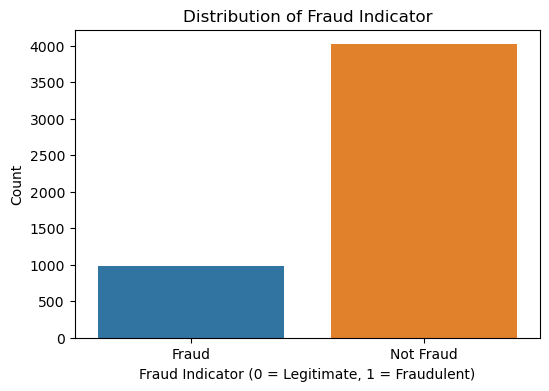

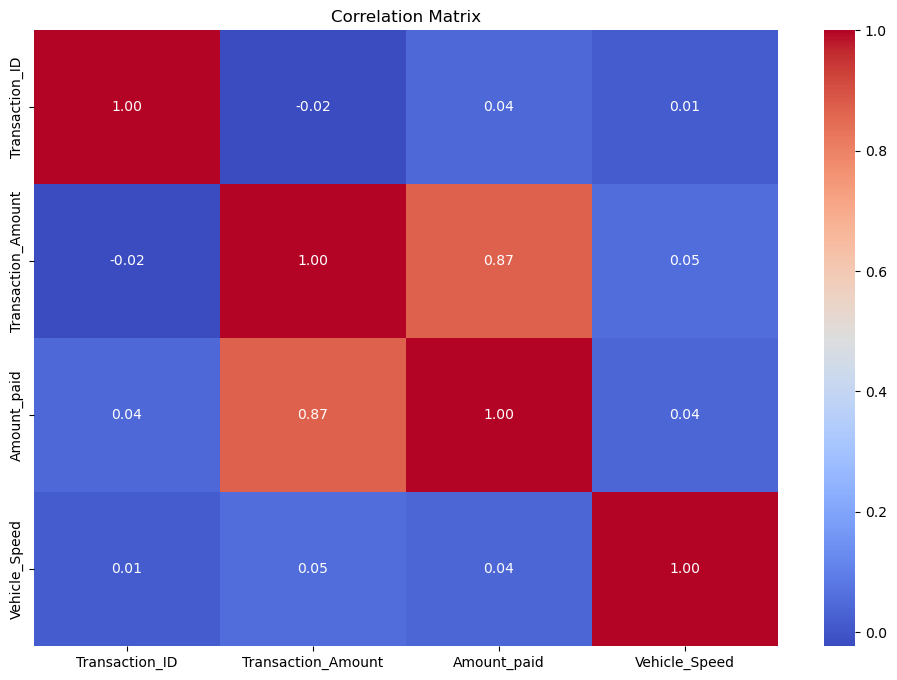

Model Performance:
Accuracy: 0.985
Precision: 1.0
Recall: 0.9308755760368663
F1 Score: 0.964200477326969
Fastag fraud detection system built and evaluated successfully!


In [179]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('FastagFraudDetection.csv')

# Display dataset information
print("Dataset shape:", data.shape)
print("Columns:", data.columns)
print("Sample data:", data.head())

# Step 1: Data Exploration
# Check for missing values
print("Missing values:", data.isnull().sum())

# Check data types
print("Data types:", data.dtypes)

# Encode the target variable
label_encoder = LabelEncoder()
data['Fraud_indicator'] = label_encoder.fit_transform(data['Fraud_indicator'])

# Visualize the distribution of the target variable

plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()

# Visualize correlations between features
# Only select numeric columns for correlation computation

# Correlation matrix
numeric_df = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 2: Feature Engineering
# Convert timestamp to datetime and extract features
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year

# Drop unnecessary columns
data = data.drop(columns=['Transaction_ID', 'Timestamp', 'Vehicle_Plate_Number'])

# Step 3: Data Preprocessing
# Separate features and target
X = data.drop(columns=['Fraud_indicator'])
y = data['Fraud_indicator']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline for numerical data
numerical_transformer = StandardScaler()

# Preprocessing pipeline for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 4: Model Development
# Create a pipeline that combines preprocessing and model training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=label_encoder.transform(['Fraud'])[0])
recall = recall_score(y_test, y_pred, pos_label=label_encoder.transform(['Fraud'])[0])
f1 = f1_score(y_test, y_pred, pos_label=label_encoder.transform(['Fraud'])[0])

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 6: Real-time Fraud Detection
# For real-time fraud detection, the trained model needs to be integrated into a production environment.
# This might involve setting up an API using frameworks like Flask or FastAPI, and connecting to a real-time data stream.

# Step 7: Explanatory Analysis
# Provide insights into the factors contributing to fraudulent transactions.
# For instance, feature importance analysis can be performed to identify key features.

# Conclusion
print("Fastag fraud detection system built and evaluated successfully!")